In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-bias-in-product-recommendations/electronics.csv
/kaggle/input/marketing-bias-in-product-recommendations/modcloth.csv


In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import chi2_contingency, ttest_ind, ttest_rel, f_oneway
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
rc('pdf', fonttype=42)
import numpy as np 
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import datetime as dt
%matplotlib inline
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
electronics_Data=pd.read_csv('../input/marketing-bias-in-product-recommendations/electronics.csv')
modcloth_Data=pd.read_csv('../input/marketing-bias-in-product-recommendations/modcloth.csv')

In [4]:
df_electronics= electronics_Data
df_modcloth= modcloth_Data

In [5]:
df_electronics

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


In [6]:
df_modcloth

,item_id,user_id,rating,timestamp,size,fit,user_attr,model_attr,category,brand,year,split
0,7443,Alex,4,2010-01-21 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
1,7443,carolyn.agan,3,2010-01-27 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
2,7443,Robyn,4,2010-01-29 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
3,7443,De,4,2010-02-13 08:00:00+00:00,NaN,NaN,NaN,Small,Dresses,NaN,2012,0
4,7443,tasha,4,2010-02-18 08:00:00+00:00,NaN,NaN,Small,Small,Dresses,NaN,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99888,154797,BernMarie,5,2019-06-26 21:15:13.165000+00:00,6.0,Just right,Large,Small&Large,Dresses,NaN,2017,0
99889,77949,Sam,4,2019-06-26 23:22:29.633000+00:00,4.0,Slightly small,Small,Small&Large,Bottoms,NaN,2014,2
99890,67194,Janice,5,2019-06-27 00:20:52.125000+00:00,NaN,Just right,Small,Small&Large,Dresses,NaN,2013,2
99891,71607,amy,3,2019-06-27 15:45:06.250000+00:00,NaN,Slightly small,Small,Small&Large,Outerwear,Jack by BB Dakota,2016,2


In [7]:
df_electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [8]:
df_modcloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99893 entries, 0 to 99892
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item_id     99893 non-null  int64  
 1   user_id     99892 non-null  object 
 2   rating      99893 non-null  int64  
 3   timestamp   99893 non-null  object 
 4   size        78133 non-null  float64
 5   fit         81387 non-null  object 
 6   user_attr   91526 non-null  object 
 7   model_attr  99893 non-null  object 
 8   category    99893 non-null  object 
 9   brand       25913 non-null  object 
 10  year        99893 non-null  int64  
 11  split       99893 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 9.1+ MB


In [9]:
#Checking for null orna in the dataset
df_electronics.isna().sum() 

item_id       0      
user_id       0      
rating        0      
timestamp     0      
model_attr    0      
category      0      
brand         961834 
year          0      
user_attr     1118830
split         0      
dtype: int64

In [10]:
#Checking for null orna in the dataset
df_modcloth.isna().sum() 

item_id       0    
user_id       1    
rating        0    
timestamp     0    
size          21760
fit           18506
user_attr     8367 
model_attr    0    
category      0    
brand         73980
year          0    
split         0    
dtype: int64

<AxesSubplot:>

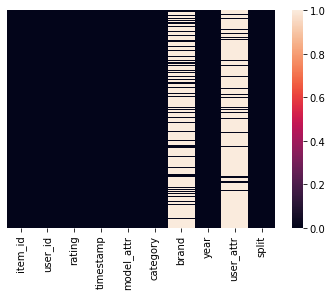

In [11]:
# visualizing null values in the Trainig data set
sns.heatmap(df_electronics.isnull(), yticklabels=False, cbar='False')

<AxesSubplot:>

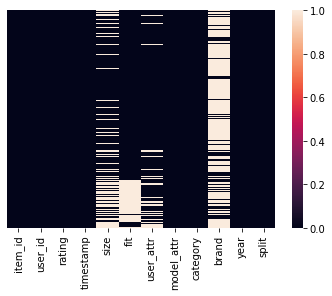

In [12]:
# visualizing null values in the Trainig data set
sns.heatmap(df_modcloth.isnull(), yticklabels=False, cbar='False')

In [13]:
df_electronics.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


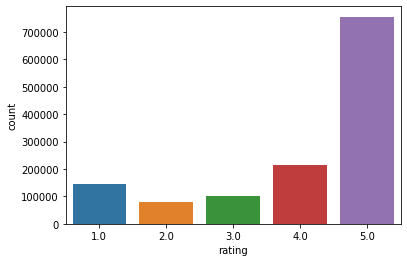

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0    78648 
Name: rating, dtype: int64


In [14]:
sns.countplot(df_electronics['rating'])
plt.show()
print (df_electronics['rating'].value_counts())

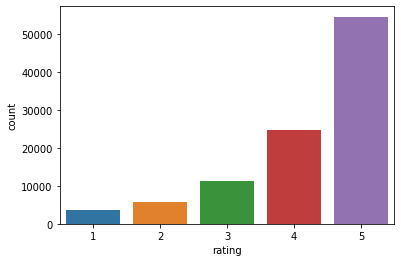

5    54568
4    24591
3    11360
2    5851 
1    3523 
Name: rating, dtype: int64


In [15]:
sns.countplot(df_modcloth['rating'])
plt.show()
print (df_modcloth['rating'].value_counts())

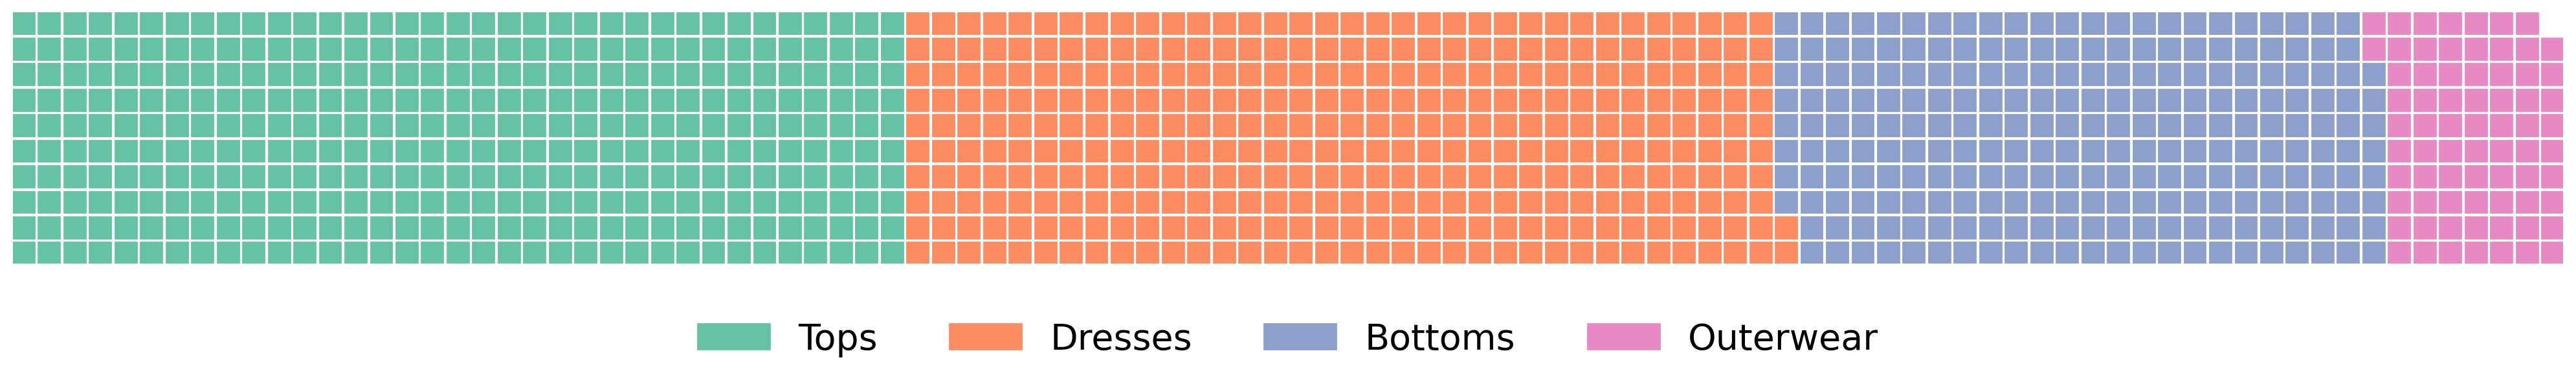

In [16]:
!pip install squarify pywaffle -qq
import squarify
from pywaffle import Waffle
fig = plt.figure( 
    FigureClass = Waffle, 
    rows = 10, 
    values = round(df_modcloth.category.value_counts()/100), 
    labels = df_modcloth.category.value_counts().index.tolist(), 
    legend={'loc': 'center', 'bbox_to_anchor': (0.5, -0.3), 'ncol': 5, 'framealpha': 0, 'fontsize':20}, 
    dpi=200, figsize=(20, 20))

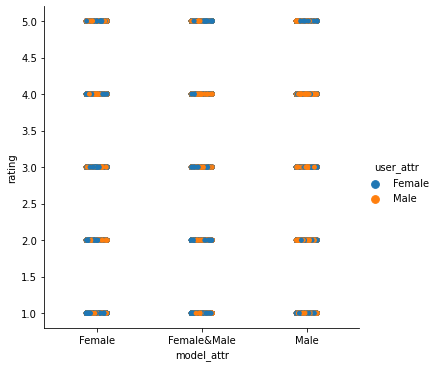

In [17]:
g = sns.catplot(x="model_attr", y="rating", hue="user_attr", data=df_electronics)

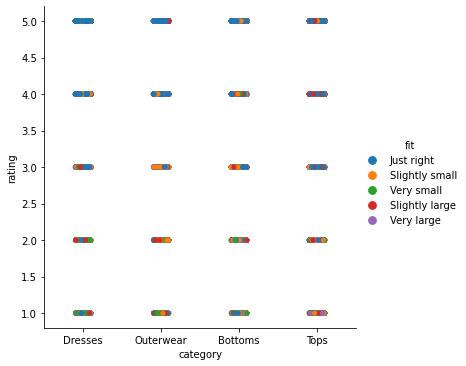

In [18]:
g = sns.catplot(x="category", y="rating", hue="fit", data=df_modcloth)

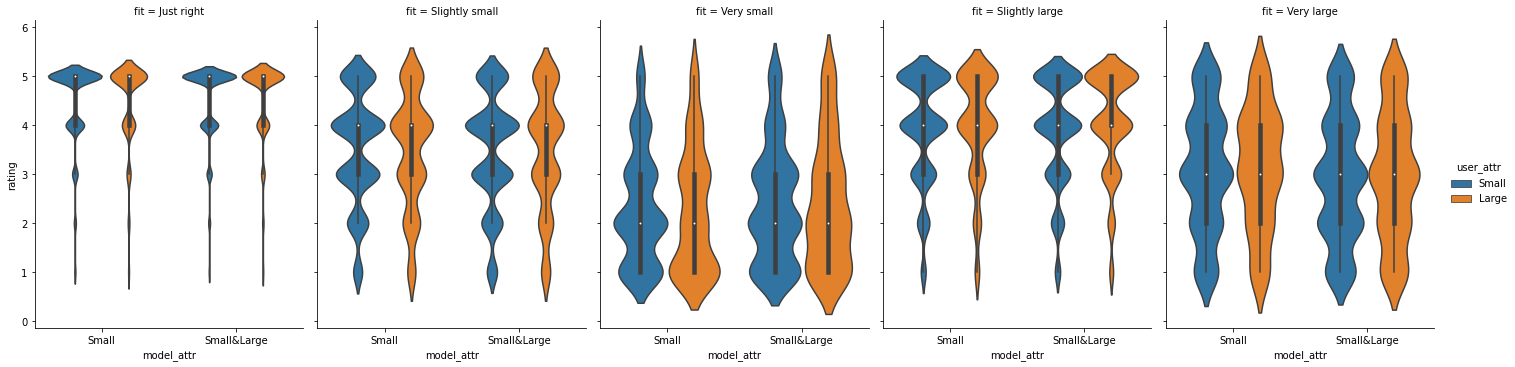

In [19]:
g = sns.catplot(x="model_attr", y="rating", hue="user_attr", col="fit",data=df_modcloth,kind="violin", aspect=.8)

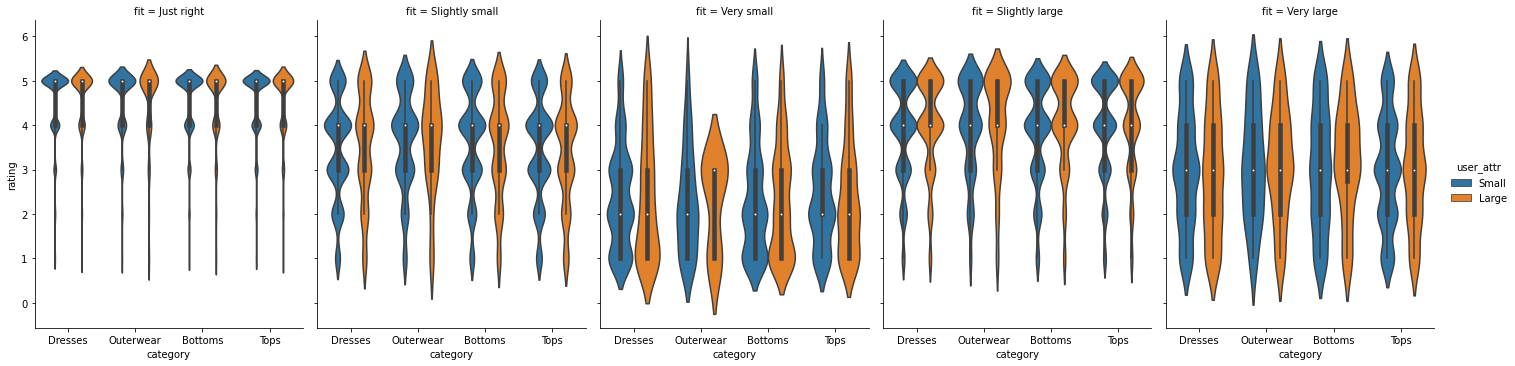

In [20]:
g = sns.catplot(x="category", y="rating", hue="user_attr", col="fit",data=df_modcloth,kind="violin", aspect=.8)

<AxesSubplot:xlabel='rating', ylabel='fit'>

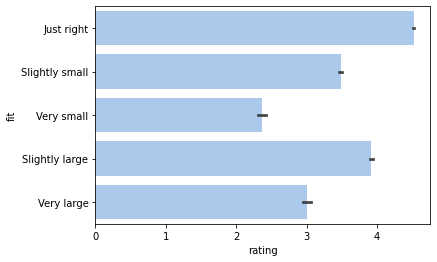

In [21]:
sns.set_color_codes("pastel")
sns.barplot(x="rating", y="fit", data=df_modcloth,
            label="rating", color="b")

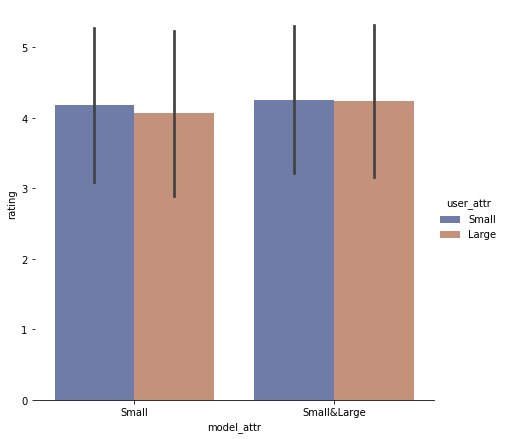

In [22]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_modcloth, kind="bar",
    x="model_attr", y="rating", hue="user_attr",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("model_attr", "rating")
g.legend.set_title("user_attr")

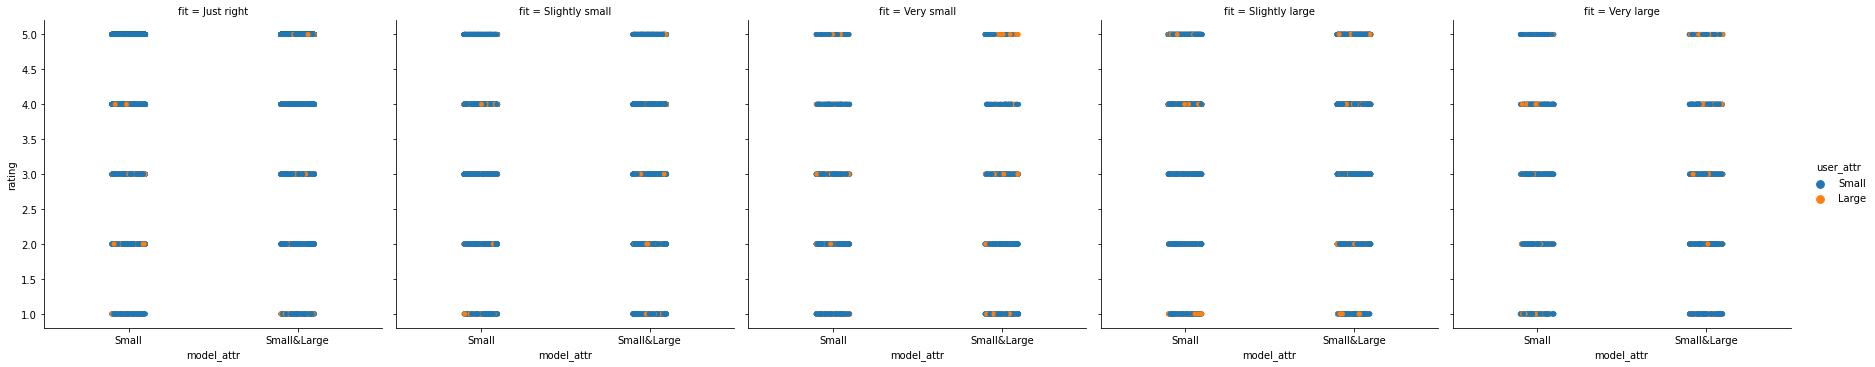

In [23]:
g = sns.catplot(x="model_attr", y="rating",hue="user_attr", col="fit",data=df_modcloth)

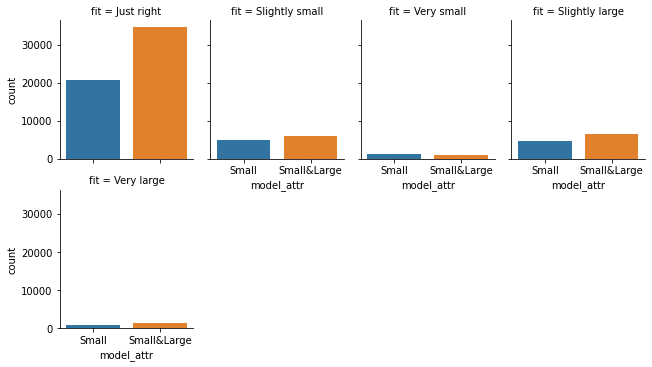

In [24]:
g = sns.catplot(x="model_attr", col="fit", col_wrap=4,
                data=df_modcloth[df_modcloth.fit.notnull()],
                kind="count", height=2.5, aspect=.9)

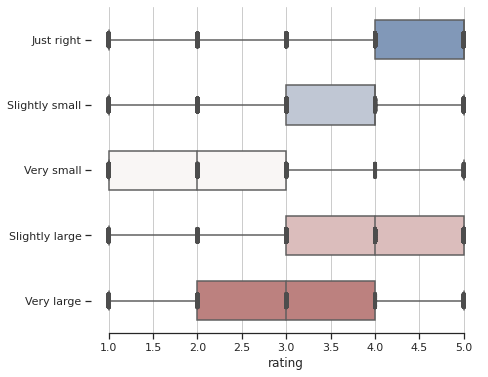

In [25]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))


# Plot the orbital period with horizontal boxes
sns.boxplot(x="rating", y="fit", data=df_modcloth,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="rating", y="fit", data=df_modcloth,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [26]:
tab = pd.crosstab(df_modcloth['model_attr'], df_modcloth['user_attr'], margins=True)
tab

user_attr,Large,Small,All
model_attr,,,
Small,7038,31800,38838
Small&Large,11327,41361,52688
All,18365,73161,91526


In [27]:
tab1 = df_modcloth.groupby(['model_attr', 'user_attr'])['rating'].size().unstack()
tab1

user_attr,Large,Small
model_attr,,
Small,7038,31800
Small&Large,11327,41361


In [28]:
def contingency_table(df_review, columns=[]):
    tab = pd.crosstab(df_review['model_attr'], df_review['user_attr'], margins=True)
    if len(columns)>0:
        tab = tab[columns]
    print('contingency table')
    display(tab)
    tab = df_review.groupby(['model_attr', 'user_attr'])['rating'].size().unstack()
    if len(columns)>1:
        tab = tab[columns[:-1]]
    g, p, dof, expctd = chi2_contingency(tab.values)
    print('chi2', g.round(3), 'p-value', p.round(3))
    print('')
    print('real market size - expcted market size')
    display((tab-expctd).round(2))

In [29]:
def chi2_test_by_year(df_review):
    chi, p, _, expctd = chi2_contingency(df_review.groupby(['model_attr', 'user_attr'])['rating'].size().unstack().values)
    chi1, p1, _, expctd1 = chi2_contingency(df_review.loc[
        df_review['timestamp'].apply(lambda x: x.year<=2014)].groupby([
        'model_attr', 'user_attr'])['rating'].size().unstack().values)
    chi2, p2, _, expctd2 = chi2_contingency(df_review.loc[
        df_review['timestamp'].apply(lambda x: x.year==2015)].groupby([
        'model_attr', 'user_attr'])['rating'].size().unstack().values)
    chi3, p3, _, expctd3 = chi2_contingency(df_review.loc[
        df_review['timestamp'].apply(lambda x: x.year==2016)].groupby([
        'model_attr', 'user_attr'])['rating'].size().unstack().values)
    chi4, p4, _, expctd4 = chi2_contingency(df_review.loc[
        df_review['timestamp'].apply(lambda x: x.year>=2017)].groupby([
        'model_attr', 'user_attr'])['rating'].size().unstack().values)
    df = pd.DataFrame(np.array([[chi, p, expctd.sum()],
                                [chi1, p1, expctd1.sum()],
                                [chi2, p2, expctd2.sum()],
                                [chi3, p3, expctd3.sum()],
                                [chi4, p4, expctd4.sum()],]), 
                      columns=['chi2', 'p-value', 'sum'],
                      index=['all', '<=2014', '2015', '2016', '>=2017'])
    display(df.round(3))

In [30]:
def two_way_anova(df_review, metric):
    test3 = sm.stats.anova_lm(ols(metric+' ~ model_attr*user_attr', data=df_review).fit()).values[:3,-2:]
    df = pd.DataFrame(test3, columns=['F-stat', 'p-value'], index=['product', 'user', 'product:user'])
    display(df.round(3))
    return df

In [31]:
def plot_avg_by_segment(df_review, metric, figsize, index=[], dataset='', dump=True):
    fig = plt.figure(figsize=figsize)
    group_rating = df_review.groupby(['user_attr', 'model_attr'])[metric].mean().unstack()
    group_std = 1.96*df_review.groupby(['user_attr', 'model_attr'])[metric].sem().unstack()
    if len(index)>0:
        group_rating = group_rating.loc[index]
    group_rating.index = group_rating.index.rename('user identity')
    group_rating.columns = group_rating.columns.rename('product image')
    text = []
    for ri in range(group_rating.shape[0]):
        row = []
        for ci in range(group_rating.shape[1]):
            row.append(str(group_rating.values[ri, ci].round(2))+'\n('+r'$\pm$'+str(group_std.values[ri, ci].round(2))+')')
        text.append(row)
    text = np.array(text)
    
    sns.heatmap(group_rating, annot=text, fmt='s', cmap="YlGnBu", annot_kws={"size": 13},
                cbar=False)
    if dump:
        fig.savefig('./plot/'+dataset+'_'+metric+'_heatmap.pdf', bbox_inches='tight')

In [32]:
contingency_table(df_modcloth, ['Small', 'Large', 'All'])

contingency table


user_attr,Small,Large,All
model_attr,,,
Small,31800,7038,38838
Small&Large,41361,11327,52688
All,73161,18365,91526


chi2 158.739 p-value 0.0

real market size - expcted market size


user_attr,Small,Large
model_attr,,
Small,754.98,-754.98
Small&Large,-754.98,754.98


In [33]:
df_modcloth['timestamp'] = pd.to_datetime(df_modcloth['timestamp'])
chi2_test_by_year(df_modcloth)

,chi2,p-value,sum
all,158.739,0.000,91526.0
<=2014,0.532,0.466,25383.0
2015,66.722,0.000,20241.0
2016,70.816,0.000,21239.0
>=2017,29.046,0.000,24663.0


,F-stat,p-value
product,171.914,0.0
user,46.312,0.0
product:user,30.685,0.0


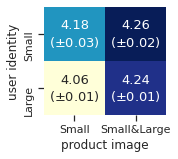

In [34]:
_ = two_way_anova(df_modcloth, 'rating')
plot_avg_by_segment(df_modcloth, 'rating', (2.2,2), ['Small', 'Large'], df_modcloth, dump=False)

In [35]:
df_modcloth['fit_score'] = 0.0
df_modcloth['fit_score'].loc[df_modcloth['fit'] == 'Just right'] = 1.0
df_modcloth['fit_score'].loc[df_modcloth['fit'].isna()] = None

,F-stat,p-value
product,293.111,0.000
user,402.441,0.000
product:user,0.000,0.997


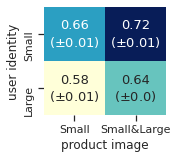

In [36]:
_ = two_way_anova(df_modcloth, 'fit_score')
plot_avg_by_segment(df_modcloth, 'fit_score', (2.2,2), ['Small', 'Large'], df_modcloth, dump=False)

In [37]:
contingency_table(df_electronics)

contingency table


user_attr,Female,Male,All
model_attr,,,
Female,34259,31587,65846
Female&Male,26478,24930,51408
Male,25963,30907,56870
All,86700,87424,174124


chi2 581.849 p-value 0.0

real market size - expcted market size


user_attr,Female,Male
model_attr,,
Female,1472.89,-1472.89
Female&Male,880.88,-880.88
Male,-2353.77,2353.77


,F-stat,p-value
product,62.581,0.000
user,3.508,0.061
product:user,0.907,0.404


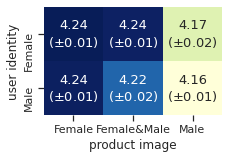

In [38]:
_ = two_way_anova(df_electronics, 'rating')
plot_avg_by_segment(electronics_Data, 'rating', (3.2,2), [], dataset=df_electronics, dump=False)

In [39]:
!pip install smclarify
from smclarify.bias import report

     |████████████████████████████████| 49 kB 1.3 MB/s 
     |████████████████████████████████| 50 kB 2.1 MB/s 
     |████████████████████████████████| 7.7 MB 519 kB/s 
  Created wheel for aiobotocore: filename=aiobotocore-1.3.3-py3-none-any.whl size=48335 sha256=57eab60b80d7011ac3a7b84eaa3bc34f88690ebca69788417c748a0986ddc82b
  Stored in directory: /root/.cache/pip/wheels/29/82/8c/1fdaf3716b8ed7b531866c66f388efdaa35c38ae48b0fd9415
Successfully built aiobotocore
  Attempting uninstall: botocore
    Found existing installation: botocore 1.20.53
    Uninstalling botocore-1.20.53:
      Successfully uninstalled botocore-1.20.53
  Attempting uninstall: aiobotocore
    Found existing installation: aiobotocore 1.3.0
    Uninstalling aiobotocore-1.3.0:
      Successfully uninstalled aiobotocore-1.3.0
